Total records: 6264
Total records: 6192
stupid_question: 54
age_limit: 50
university_enrollment: 48
fight_in_ukraine: 46
can_police_firefighters_and_others_become_active_backups: 42
gluten_free: 40
dog_handler: 40
working_while_serving_enterpreneurship: 40
only_elementary_school_finished: 38
paying_for_education_in_case_failure_at_the_defense_university: 36
scoliosis: 34
basic_requirements_for_entering_the_army: 34
location_of_physical_tests: 34
work_location: 34
diabetes: 34
vyskov_psychoactive_substances: 34
health_check_eye_glasses: 32
mental_and_communication_difficulties: 32
insult: 32
where_to_start: 32
women_in_army: 32
education_and_vaccated_positions: 32
repeating_physical_tests: 32
teeth: 30
missed_call_from_recruiter: 30
recruitment_bonus: 30
blue_book: 30
bmi_for_castle_guard: 30
hair: 30
diet_prior_to_health_check: 30
dual_citizenship: 30
special_dietary_requirements: 30
crohn_illness: 30
volutariness_of_foreign_missions: 30
repeating_health_check: 30
plastic_surgery_of_th

<Axes: xlabel='label'>

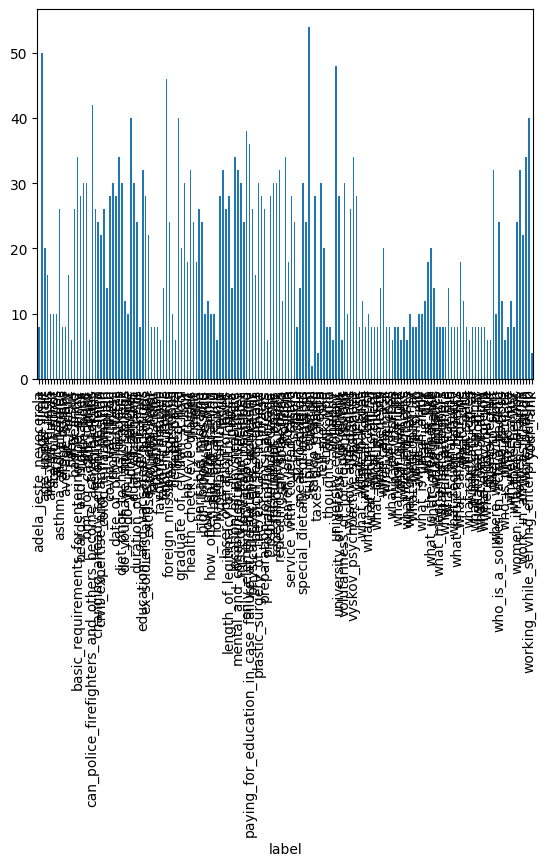

In [27]:
import pandas as pd

datapath = 'army_intents.csv'

df = pd.read_csv(datapath)

print(f"Total records: {df.size}")
df = df.drop(df[df['label'] == "tattoo"].index)
print(f"Total records: {df.size}")

counts = df['label'].value_counts()
for label, count in counts.items():
    print(f"{label}: {count}")

df.groupby(['label']).size().plot.bar()

In [22]:
from dataset import Dataset, Labeler
import numpy as np
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split

DATA_PATH = 'army_intents.csv'
TRANSFORMER_MODEL_ID = 'bert-base-multilingual-cased'

tokenizer = BertTokenizer.from_pretrained(TRANSFORMER_MODEL_ID)
df = pd.read_csv(DATA_PATH)
labeler = Labeler(df)
dataset = Dataset(tokenizer, df, labeler)

# THIS IS NOT A MISTAKE, IT HASE TO BE DONE THIS WAY, USING train_test_split, to preserve the ratios correctly
df_test_val, df_train = train_test_split(df, test_size=0.75, random_state=42, stratify=df["label"])
df_test, df_val = train_test_split(df_test_val, test_size=0.6, random_state=42, stratify=df_test_val["label"])

print(f"{len(df)} rozděleno na: {len(df_train)} train, {len(df_val)} validation, {len(df_test)} test")

from matplotlib import pyplot as plt

for df in [df_train, df_val, df_test]:
    print("====================================")
    counts = df['label'].value_counts()
    for label, count in counts.items():
        print(f"{label}: {count}")

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.